In [2]:
import uproot
import xgboost as xgb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

www_file = uproot.open('./WWW.root')
www_branches = www_file['t'].arrays()
www_features = []
for key in www_file['t'].keys():
    www_features.append(www_branches[key])
signal = np.transpose(np.array(www_features))
print(signal)
len(signal)

[[ 68.90540314  57.62403107   2.         ... 102.97488403 574.875
  804.37927246]
 [325.68054199  54.40904617   4.         ...  82.44493103 350.25
  812.7845459 ]
 [126.7311554   39.08652496   4.         ... 117.80744934 318.53125
  602.15637207]
 ...
 [ 89.26124573  34.73737717   2.         ...  47.84227753 380.15625
  551.99713135]
 [184.00798035  35.66375351   4.         ...  85.65441132 356.125
  661.45117188]
 [ 87.34474182  58.05164719   2.         ... 116.96775055 208.75
  471.11413574]]


348

In [3]:
wz_file = uproot.open('./WZ.root')
wz_branches = wz_file['t'].arrays()
wz_features = []
for key in wz_file['t'].keys():
    wz_features.append(wz_branches[key])
background = np.transpose(np.array(wz_features))
print(background)
len(background)

[[197.86581421  32.49233246   2.         ...  24.78462219 259.53125
  514.67401123]
 [282.14923096  57.1822319    4.         ...  18.00586319 298.40625
  655.74353027]
 [119.65211487  43.11584091   1.         ...  84.4717865  301.6875
  548.92724609]
 ...
 [ 29.80377769  28.99771881   4.         ... 111.25218201 457.859375
  627.91308594]
 [140.12463379  42.25994873   3.         ...  32.42145538 383.40625
  598.21228027]
 [ 65.7537384   33.10772705   1.         ... 262.2585144  288.625
  649.74499512]]


11053

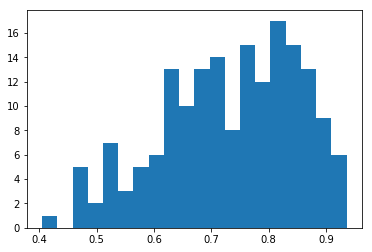

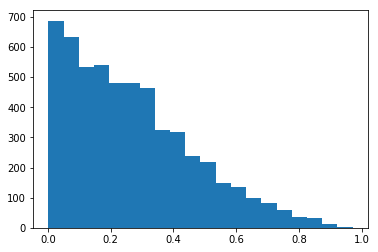

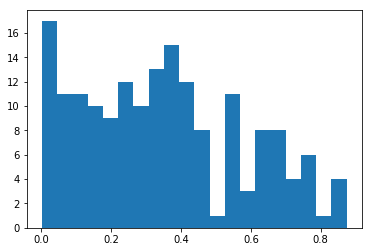

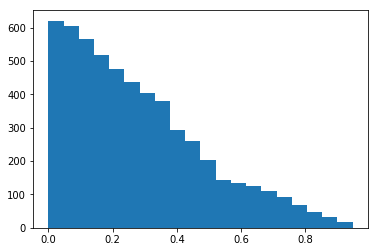

In [4]:
signal_train,signal_test = np.array_split(np.array(signal),2)
background_train,background_test = np.array_split(np.array(background),2)

train_x=np.concatenate((signal_train,background_train))
train_y=np.concatenate((np.ones(len(signal_train)),np.zeros(len(background_train))))


scale_pos_weight=(len(train_y)-np.sum(train_y))/np.sum(train_y)

model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    max_depth=2, 
    )
model.fit(train_x,train_y)

bdt_score=[]
for num in model.predict_proba(signal_train):
    bdt_score.append(num[1])                
plt.hist(bdt_score,20)
plt.show()

bdt_score=[]
for num in model.predict_proba(background_train):
    bdt_score.append(num[1])                
plt.hist(bdt_score,20)
plt.show()

bdt_score=[]
for num in model.predict_proba(signal_test):
    bdt_score.append(num[1])                
plt.hist(bdt_score,20)
plt.show()

bdt_score=[]
for num in model.predict_proba(background_test):
    bdt_score.append(num[1])                
plt.hist(bdt_score,20)
plt.show()

(array([2737., 1137.,  635.,  349.,  257.,  180.,   95.,   78.,   38.,
          20.]),
 array([3.6662117e-05, 9.6319430e-02, 1.9260220e-01, 2.8888497e-01,
        3.8516775e-01, 4.8145050e-01, 5.7773328e-01, 6.7401606e-01,
        7.7029878e-01, 8.6658156e-01, 9.6286434e-01], dtype=float32),
 <a list of 10 Patch objects>)

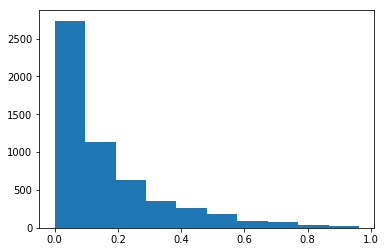

(array([60., 32., 16., 17., 14., 11., 10.,  7.,  2.,  5.]),
 array([0.00099663, 0.08513189, 0.16926715, 0.2534024 , 0.33753768,
        0.42167294, 0.5058082 , 0.58994347, 0.6740787 , 0.758214  ,
        0.84234923], dtype=float32),
 <a list of 10 Patch objects>)

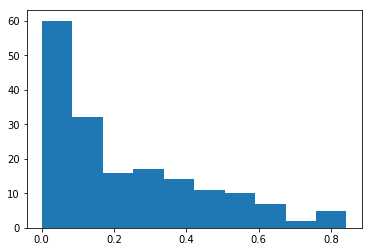